<a href="https://colab.research.google.com/github/souchem23/data-science-coursework/blob/main/Soumik_ChemudupatiU6Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Parkinson's Severity Rating (UPDRS) Given Patient Characteristics**


## Preparation/Package Installation

In [2]:
!pip install bambi
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
import graphviz as gv

## Part I: Introduction

I will be creating a linear model to predict **Parkinson's Serverity Rating (UPDRS)** for a patient, looking at physical characteristics such as **Alchohol Consumption, Physical Activity, Diet Quality, and Sleep Quality** as the model predictors. This is a very important project because neurodegenerative diseases are not that well understood in our society. If we can understood different measures to predict this disease, we can improve intervention efforts.

## Part II: Casual Diagram

In class, we learned the importance of using Casual Diagrams when constructing models based on the variable selection process. The dataset that I am using for this project is from Kaggle (https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis), and contains numerous predictors. I chose to represent the following predictors in my casual diagram:
*   Gender
*   Age
*   Ethnicity
*   Education Level
*   Diet Quality
*   Physical Activity
*   Sleep Quality
*   Alcohol Consumption

Upon drawing the casual diagram and the interactions between variables, I chose to use the following predictors to construct my models:
*   Diet Quality
*   Physical Activity
*   Sleep Quality
*   Alcohol Consumption

I found these predictors to be the most interesting, especially because they are backed up by research.
*   **Diet Quality**: There have been a variety of studies that show how certain foods can influence the progression of Parkinson's. For example, one study shows how a plant-based diet may reduce the severity of Parkinson's disease.
*   **Physical Activity**: There has been many studies and stories that show how physical activity tends to increase an individual's motor skills and coordination. As a result, they are able to combat the early effects of Parkinson's and are NOT affected by the disease as significantly anymore.
*   **Sleep Quality**: Similar to the "Physical Activity" predictor, it is shown how in general, a lack of sleep can lead to a loss in control of motor functions and skills. Over time, this can contribute to increased Parkinson's severity. Although, it is important to recognize that this predictor is often personalized for each person, since we need differing amounts of sleep in our life. This is the general consensus, though.
*   **Alcohol Consumption**: It is universally accepted that alcohol consumption can reduce motor skills and cognitive function. It can even disrupt basic ability to function, significantly increasing Parkinson's Disease severity. Thus, I am able to make this assumption with a lot of confusion and atest to this predictor's influence.

I did not choose the other factors as my predictors as these variables vary for Parkinson's disease pateints, and there is NOT a clear trend that relates these predictions to the Parkinson's Disease Severity values. I am not confident in making assumptions about how the predictors are related, so I will not be including them in my models.


## Part III: Data Processing

In [4]:
# Reading in the data
parkinsonDataURL = 'https://raw.githubusercontent.com/souchem23/data-science-coursework/refs/heads/main/parkinsons_disease_data.csv'

# Creating dataframe representation
parkinsonData = pd.read_csv(parkinsonDataURL)

parkinsonData = parkinsonData[['AlcoholConsumption','PhysicalActivity', 'DietQuality', 'SleepQuality', 'UPDRS']]

# Display processed data
parkinsonData

,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,UPDRS
0,5.108241,1.380660,3.893969,9.283194,6.458713
1,6.027648,8.409804,8.513428,5.602470,37.306703
2,2.242135,0.213275,6.498805,9.929824,67.838170
3,5.997788,1.375045,6.715033,4.196189,52.964696
4,9.775243,1.188607,4.657572,9.363925,21.804880
...,...,...,...,...,...
2100,12.674393,5.325900,5.947278,6.296231,187.887925
2101,0.977018,0.108599,4.825187,6.342325,172.325253
2102,6.152286,5.775103,0.334244,9.740019,111.851581
2103,0.292094,2.280475,9.598513,8.289390,144.474453


## Part IV: Interactions Between Predictors (Casual Diagram)

After completing my casual diagram, I went back to label some connections between predictors that I thought were "stronger" than others. On my Casual Diagram I turned in, I have identifed these connections by labeling them as "STRONG". I made these assocations so that I can determine if my assumptions about the real world are correct. Essentially, I can use these assocations to create models and check how they reflect reality. Below are the connections identified as "STRONG":
*   "Alcohol Consumption" --> "Diet Quality"
  *  Alcohol Consumption can affect our digestive system, changing our perception regarding hunger and food. This is a very significant connection.
*   "Alcohol Consumption" --> "Sleep Quality"
  * Alcohol consumption significantly affects our brain and nervous system, affecting our sleep cycles in different ways. Since alcohol enters our bloodstream, it has an extremely large impact on our sleep quality.
*   "Alcohol Consumption" --> "Physical Activity"
  * In a similar manner, alcohol consumption affects various body systems that all work together to coordinate our motor functions. Thus, one's physical activity and basic motor skills will be affected by alcohol intake.
*   "Physical Activity" --> "Sleep Quality"
  * Physical activity is good for you. It can improve your sleep quality, but in excess, it can also hurt it. Thus, physical activity is like two sides of the same coin in the effect that it can produce.
*   "Physical Activity" --> "Diet Quality"
  * Additionally, physical activity can affect our digestive system and change our perception regarding hunger. This is an extremeley strong connection between there is a direct relationship between physical activity, calories, and food intake.



## Part V: Models

Model 1 --> No Interactions

In [5]:
mod1 = bmb.Model("`UPDRS`~'PhysicalActivity'+'DietQuality'+'SleepQuality'+'AlcoholConsumption'", data=parkinsonData)
idata_1 = mod1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Model 2 --> Interactions between all the predictors.

In [6]:
mod2 = bmb.Model("`UPDRS` ~ `PhysicalActivity` + `DietQuality` + `SleepQuality` + `PhysicalActivity` : `DietQuality` + `PhysicalActivity`: `SleepQuality` + `SleepQuality`:`DietQuality`", data=parkinsonData)
idata_2 = mod2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Model 3 --> Interactions between all predictors.

In [7]:
mod3 = bmb.Model("`UPDRS` ~ `AlcoholConsumption` + `DietQuality` + `SleepQuality` + `AlcoholConsumption` : `DietQuality` : `SleepQuality`", data=parkinsonData)
idata_3 = mod3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Model 4 --> Predictors PhysicalActivity and Diet Quality

In [8]:
mod4 = bmb.Model("`UPDRS` ~ `PhysicalActivity` + `DietQuality` + `SleepQuality` + `PhysicalActivity` : `DietQuality`", data=parkinsonData)
idata_4 = mod4.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Model 5 --> Predictors PhysicalActivity and SleepQuality

In [9]:
mod5 = bmb.Model("`UPDRS` ~ `PhysicalActivity` + `DietQuality` + `SleepQuality` + `PhysicalActivity` : `SleepQuality`", data=parkinsonData)
idata_5 = mod5.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Model 6 --> Predictors SleepQuality and DietQuality

In [10]:
mod6 = bmb.Model("`UPDRS` ~ `PhysicalActivity` + `DietQuality` + `SleepQuality` + `SleepQuality` : `DietQuality`", data=parkinsonData)
idata_6 = mod6.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Model 7 --> Predictors except SleepQuality

In [11]:
mod7 = bmb.Model("`UPDRS` ~ `PhysicalActivity` + `DietQuality` + `SleepQuality` + `PhysicalActivity` : `DietQuality` + `PhysicalActivity`: `SleepQuality`", data=parkinsonData)
idata_7 = mod7.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Model 8

In [15]:
mod8 = bmb.Model("`UPDRS` ~ (`PhysicalActivity`|DietQuality)", data=parkinsonData)
idata_8 = mod8.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 66 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


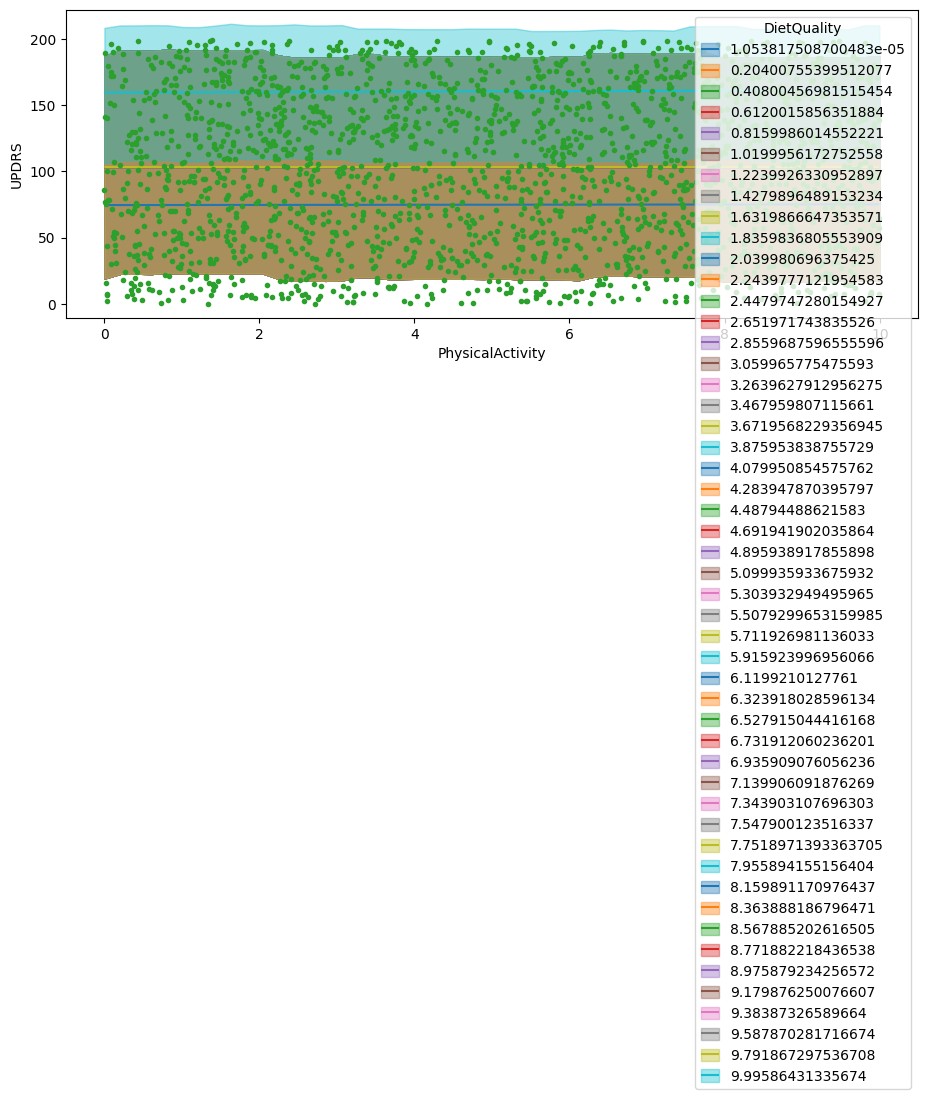

In [25]:
bmb.interpret.plot_predictions(mod8,
                               idata_8,
                               ["PhysicalActivity","DietQuality"],
                               fig_kwargs={"figsize":(11, 4)},
                               sample_new_groups=True)
plt.plot(parkinsonData.PhysicalActivity,parkinsonData.UPDRS, "C2.")

Model 9

In [13]:
mod9 = bmb.Model("`UPDRS` ~ (`SleepQuality`|DietQuality)", data=parkinsonData)
idata_9 = mod9.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 565 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


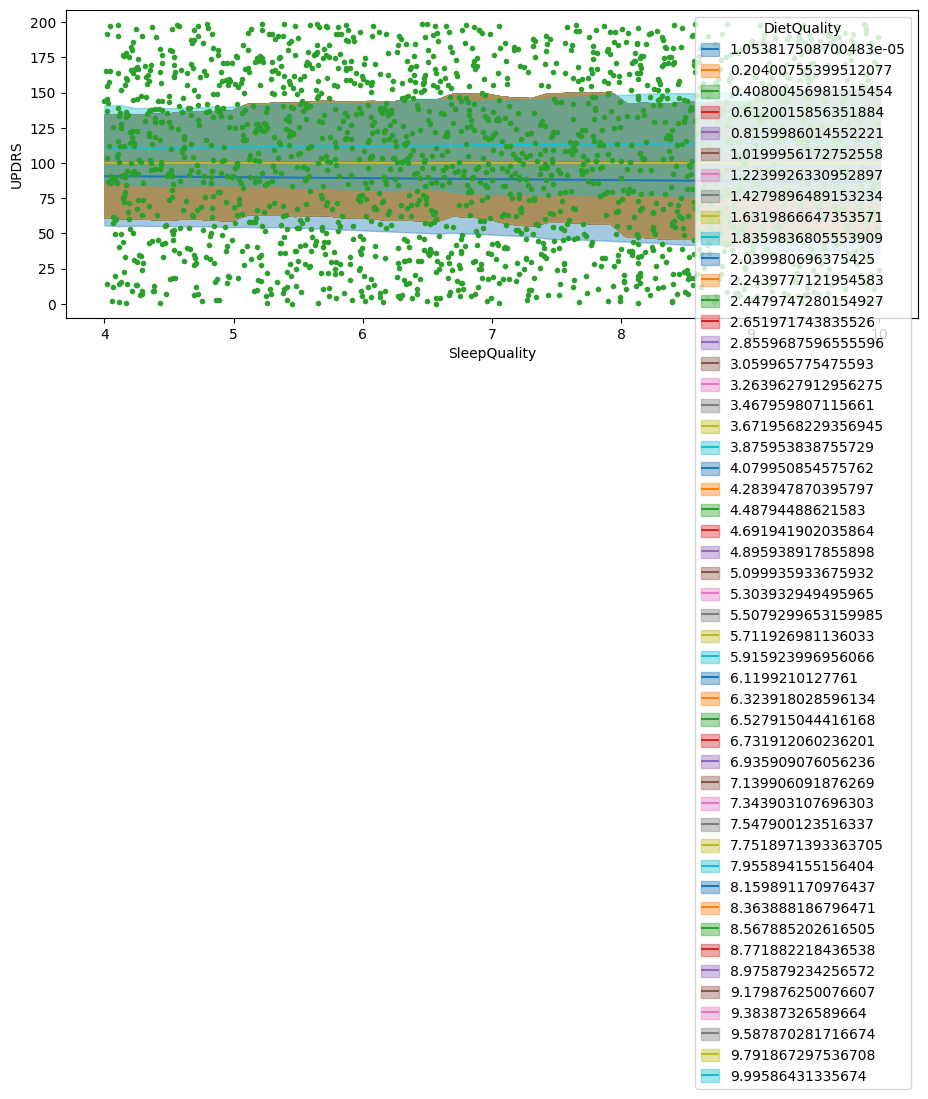

In [26]:
bmb.interpret.plot_predictions(mod9,
                               idata_9,
                               ["SleepQuality","DietQuality"],
                               fig_kwargs={"figsize":(11, 4)},
                               sample_new_groups=True)
plt.plot(parkinsonData.SleepQuality,parkinsonData.UPDRS, "C2.")

Model 10

In [16]:
mod10 = bmb.Model("`UPDRS` ~ (`AlcoholConsumption`|PhysicalActivity)", data=parkinsonData)
idata_10 = mod10.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 433 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='AlcoholConsumption', ylabel='UPDRS'>], dtype=object))

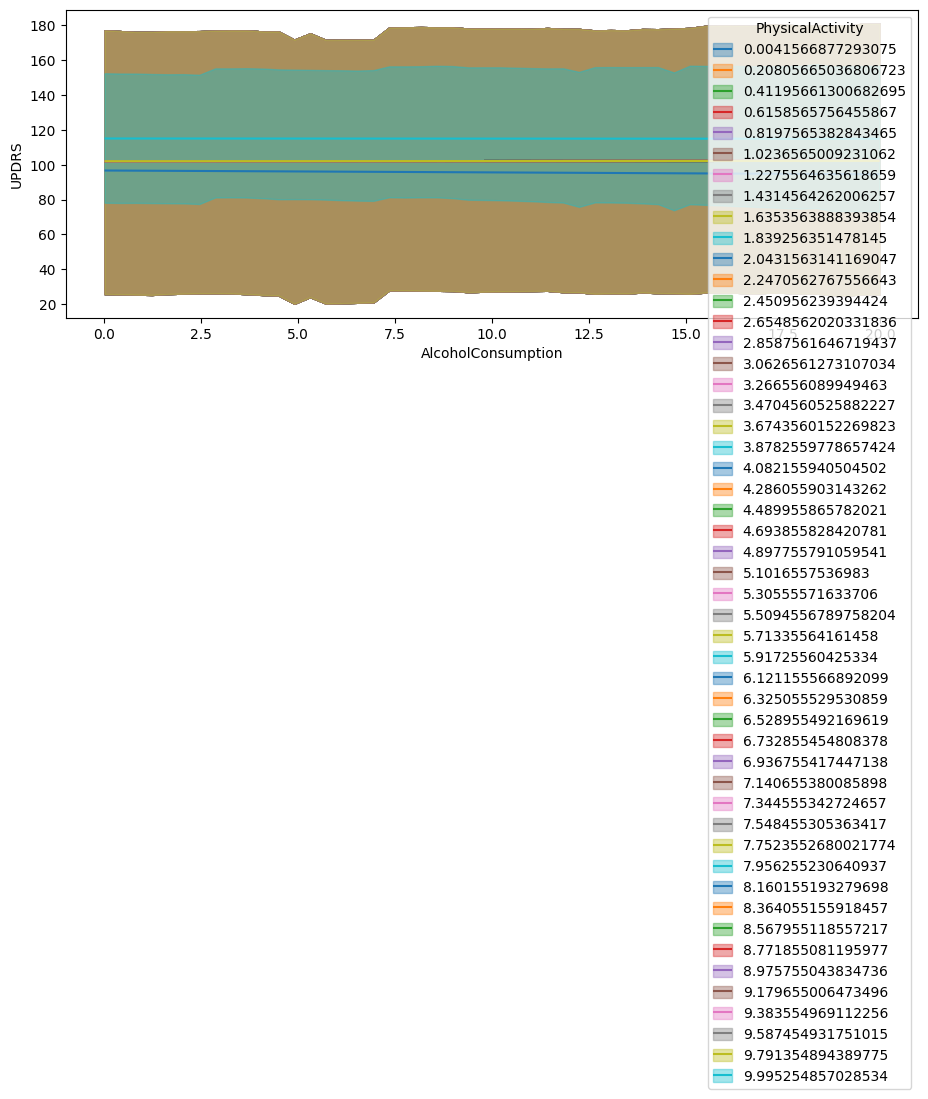

In [19]:
bmb.interpret.plot_predictions(mod10,
                               idata_10,
                               ["AlcoholConsumption","PhysicalActivity"],
                               fig_kwargs={"figsize":(11, 4)},
                               sample_new_groups=True)

Comparison

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1043: RuntimeWarning: ove

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

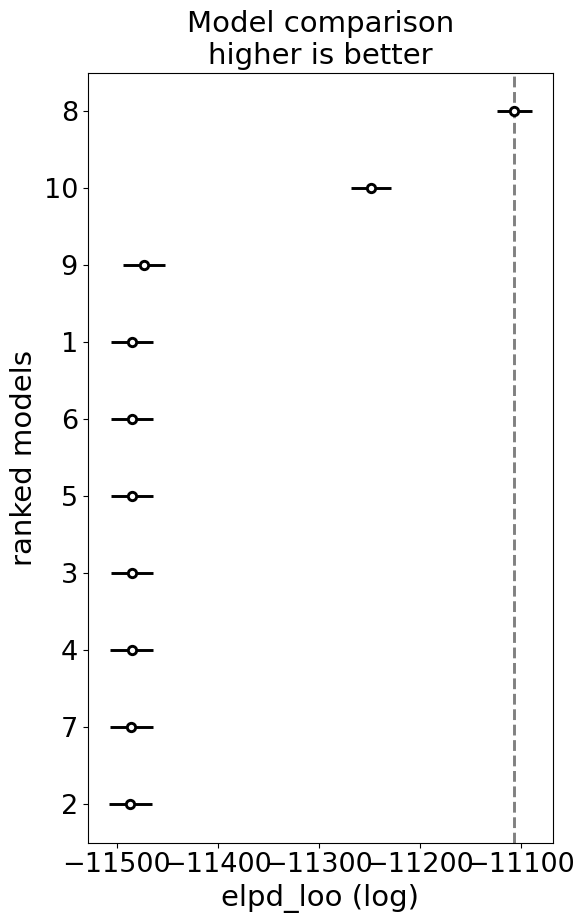

In [17]:
compareModels = az.compare({"1":idata_1,"2":idata_2, "3":idata_3, "4":idata_4, "5":idata_5, "6":idata_6, "7":idata_7, "8":idata_8, "9":idata_9, "10":idata_10})
az.plot_compare(compareModels)

## Part V: Conclusion

Alright, so let's break down what we have found here.

Simply looking at the elpd_loo values, we can tell that Model 8 is the best model. It has the higher elpd_loo value and reprents the heirarchical model bewteen both the predictors "Physical Activity" and "Diet Quality". Model 10 also performs well, although not as well, and it represenets the heirarchical model beteen both the predictors "Alcohol Consumption" and "Physical Activity". Other than those models, all of the other models seem to be performing relatively similar. A majority of these models relate to the interaction between more than two predictors, which tells us more about the nature of this dataset.

I am choosing **Model 8** as the best model becuase it has a few number of predictors and still has the highest elpd_loo value among the other models.

The heirarchy created in this model is based on "PhysicalActivity". I think that this actually makes a lot of sense to the real world. Many neurodegenerative diseases are based on the way that we interact with other people, such as Alzheimer's. However, Parkison's disease is different, because it is a neurodegenative disease that affects our motor skills. Many studies have shown that the best defense against the progression of Parkinson's Disease is "Physical Activity". For example, physical activity more or less can be considered a way of controlling how the disease will spread.

When I was making my casual diagram, I noticed a STRONG correlation between Physical Activity and Diet Quality. **THIS ASSUMPTION IS WRONG.** After graphing the data against a scatterplot, I can see that there is NOT a significant correlation as I thought there was. **The slopes are basically all equal to each other, so there is no assocation based on heirarchy.** Tere is sufficient evidence to show that although the elpd_loo value is the highest, there is still NO evidence that shows the correlation between the two variables. This may be due to a variety of factors, such as the origination of the dataset and the collection of data. I can look into validating this data from other sources to check if my models and predictors actually make sense or not in the future.

Honestly, I think these findings are actually pretty cool. They show us that in general, genetic factors may be more important in how Parkinson's disease affects an indvidual. Physical factors don't seem to have much of a correlations statistically, and this may extend to explain how genetics plays a much larger role.